In [36]:
# SceneEgo/data/demo/out
import pickle
import numpy as np

# img_002376
# img_001796
# img_001000
# Pickle 파일 열기
with open('data/demo/out/img_001000.jpg.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# 로드된 데이터 사용
loaded_data = np.array(loaded_data)
print(loaded_data)

# from PIL import Image
# img = Image.open('/data/demo/imgs/img_001000.jpg')
# img

[[ 0.02018631  0.31485525  0.14847675]
 [ 0.2102979   0.30609438  0.1638998 ]
 [ 0.38295296  0.359585    0.38169625]
 [ 0.29537234  0.21482816  0.5507064 ]
 [-0.13953154  0.32049632  0.22394551]
 [-0.19921866  0.35295808  0.46847087]
 [-0.10865746  0.20292144  0.63525754]
 [ 0.18763629  0.3847024   0.7267088 ]
 [ 0.26411325  0.34118745  1.116118  ]
 [ 0.24108177  0.5408697   1.341295  ]
 [ 0.2817735   0.42423105  1.515634  ]
 [-0.00996914  0.3665268   0.7432299 ]
 [-0.00401198  0.31463078  1.1308796 ]
 [ 0.08292442  0.47371113  1.4438369 ]
 [ 0.05538097  0.36967692  1.5498453 ]]


In [37]:
import json, codecs
import numpy as np

# Convert numpy array to list
loaded_data = list([x,y,1-z] for x,y,z in loaded_data)
# list_array

file_path = "output_skeleton.json" 
# # Serialize to JSON
# json_array = json.dumps(list_array)

heatmap_sequence = ["Neck", "Right_shoulder", "Right_elbow", "Right_wrist", "Left_shoulder", "Left_elbow",
                        "Left_wrist", "Right_hip", "Right_knee", "Right_ankle", "Right_foot", "Left_hip",
                        "Left_knee", "Left_ankle", "Left_foot"]

sk_dict = dict(zip(heatmap_sequence,list_array))
sk_dict
# ////////
# #In order ot store an numpy array as a .json file
# a = np.arange(10).reshape(2,5) # a 2 by 5 array
# b = a.tolist() # nested lists with same data, indices
# #    Obviously, if you already have list, you don't/can't .tolist() it
# file_path = "/path.json" ## your path variable
json.dump(sk_dict, codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4) ### this saves the array in .json format


In [14]:
img.size

NameError: name 'img' is not defined

In [15]:
loaded_data.shape

(15, 3)

In [16]:
import numpy as np
loaded_data = np.array(loaded_data)
loaded_data

array([[ 0.02018631,  0.31485525,  0.14847675],
       [ 0.2102979 ,  0.30609438,  0.1638998 ],
       [ 0.38295296,  0.359585  ,  0.38169625],
       [ 0.29537234,  0.21482816,  0.5507064 ],
       [-0.13953154,  0.32049632,  0.22394551],
       [-0.19921866,  0.35295808,  0.46847087],
       [-0.10865746,  0.20292144,  0.63525754],
       [ 0.18763629,  0.3847024 ,  0.7267088 ],
       [ 0.26411325,  0.34118745,  1.116118  ],
       [ 0.24108177,  0.5408697 ,  1.341295  ],
       [ 0.2817735 ,  0.42423105,  1.515634  ],
       [-0.00996914,  0.3665268 ,  0.7432299 ],
       [-0.00401198,  0.31463078,  1.1308796 ],
       [ 0.08292442,  0.47371113,  1.4438369 ],
       [ 0.05538097,  0.36967692,  1.5498453 ]], dtype=float32)

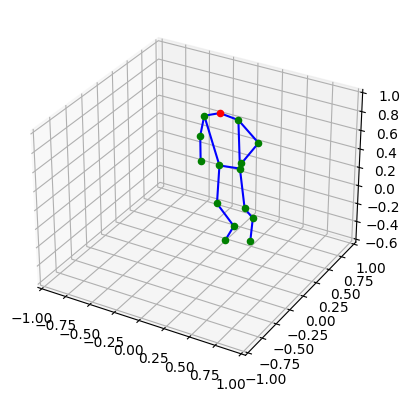

In [43]:
# %matplotlib widget

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
i=0
n=0

for x,y,z in loaded_data:
    if i == n:
        ax.scatter3D(x,y,z, color='r' )# 3D scatter plot)
    else:
        ax.scatter3D(x,y,z,color='g')
    i +=1

lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
for i,j in lines:
    x1, y1, z1 = loaded_data[i]
    x2, y2, z2 = loaded_data[j]
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-')  # 'b-'는 파란색 실선을 의미합니다.

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-0.6,1)

# Z 축의 방향을 바꿉니다.
# ax.invert_zaxis()
fig.savefig("output_img.png")
# fig2,ax2 = plt.subplots()
# plt.imshow(img)

## 3D Skeleton animation으로 만들기
-> 한 번만 하면 앞으로 계속 애니매이션으로 바뀜 주의

### 아래 코드는 애니매이션이 같은 폴더에 저장됨
저장 말고 보고 싶으면 -> 아래 코드 실행시키고 위 코드 실행시키기.

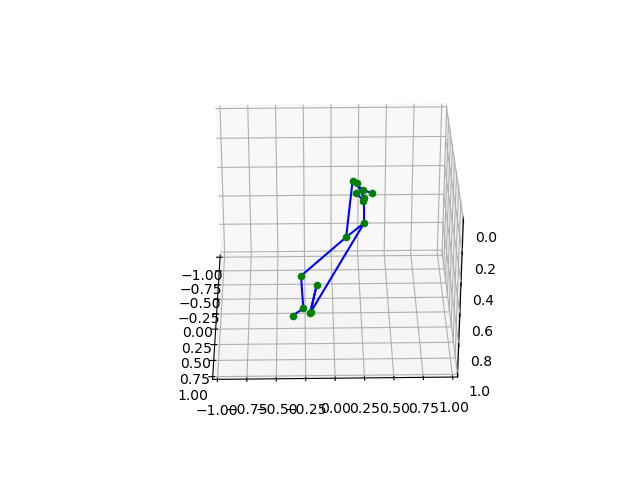

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import animation 
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

def init():

    for x,y,z in loaded_data:
        ax.scatter3D(x,y,z,color='g')
        
    lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
    
    for i,j in lines:
        x1, y1, z1 = loaded_data[i]
        x2, y2, z2 = loaded_data[j]
        ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-')  # 'b-'는 파란색 실선을 의미합니다.
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(0,1)

# Z 축의 방향을 바꿉니다.
ax.invert_zaxis()

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('mpl3d_scatter.gif', fps=30)

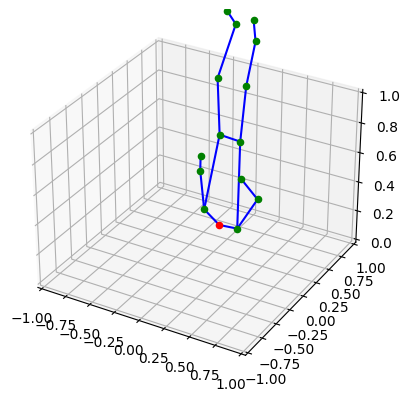

In [20]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
i=0
n=0
for x,y,z in loaded_data:
    if i == n:
        ax.scatter3D(x,y,z, color='r' )# 3D scatter plot)
    else:
        ax.scatter3D(x,y,z,color='g')
    i +=1
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(0,1)

# 점들을 연결하는 선을 그립니다.
# for i in range(len(loaded_data) - 1):

lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
for i,j in lines:
    x1, y1, z1 = loaded_data[i]
    x2, y2, z2 = loaded_data[j]
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-')  # 'b-'는 파란색 실선을 의미합니다.

# Z 축의 방향을 바꿉니다.
# ax.invert_zaxis()

# fig2,ax2 = plt.subplots()
# plt.imshow(img)